In [1]:
import matplotlib.pyplot as plt
import numpy as np

def scatter(xData,yData,title,x_label,y_label):
    x = [1,2,3,4,5]
    # linear regression with least squares
    m, b = np.polyfit(x, yData, deg=1)
    plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
    plt.scatter(xData,yData)
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    plt.ylim(0, 1)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=10)
    plt.title(title,fontsize=10)
    plt.show()

In [3]:
from gensim.models import Word2Vec
period1580 = Word2Vec.load("/srv/data/tensor/savedModels/period1.model")
period1600 = Word2Vec.load("/srv/data/tensor/savedModels/1600-17.model")
period1635 = Word2Vec.load("/srv/data/tensor/savedModels/period5.model")
period1625 = Word2Vec.load("/srv/data/tensor/savedModels/period3.model")
period1618 = Word2Vec.load("/srv/data/tensor/savedModels/1618-24.model")
models = [period1580,period1600,period1618,period1635,period1625]
names = ['1','2','3','4','5']

In [4]:
xData = ['1580-1599','1600-1617','1618-1624','1625-1634','1636-1641']
yData = []
selling = ['retail','coin','bullion','penny','merchantable','sixpence','vend','retail']
liquor = ['wine','beer','ale','sip','cup','liquor','drink','claret','draught']
good = ['wholesome','healthy','cure','moderate','necessary','beneficial','moderation','temperance']
bad = ['unwholesome','unhealthy','immoderate','unnecessary','harmful','intemperance','immoderation']
search = ['intoxicate']
for idx,model in enumerate(models): 
    totalScore = 0
    num = 0
    print(names[idx])
    print(models[idx].wv.most_similar("addict"))
    for term in bad: 
        if term in model.wv:
            num+=1 
            totalScore += model.wv.similarity('poison',term)
    if num != 0: 
        yData.append(totalScore/num)
print(yData)

1
[('epicurism', 0.7635183930397034), ('extreme_madness', 0.7547529339790344), ('carnal_fleshly', 0.7537870407104492), ('unsatiable_desire', 0.7533996105194092), ('sensual_appetite', 0.749615490436554), ('fond_foolish', 0.7487196922302246), ('pompous_pride', 0.7421965003013611), ('frequentation', 0.7411962151527405), ('reasonles', 0.7376607060432434), ('careful_avoid', 0.7369658350944519)]
2
[('devote', 0.7644211649894714), ('licentious_liberty', 0.7195141911506653), ('avarice_ambition', 0.7148210406303406), ('sensual_pleasure', 0.7126157879829407), ('affect', 0.7071645855903625), ('lustful_desire', 0.7059834599494934), ('loose_reins', 0.7039823532104492), ('effeminacy', 0.7031528353691101), ('pomp_pride', 0.6988811492919922), ('careless_negligent', 0.6971282958984375)]
3
[('disordinate', 0.7387589812278748), ('sensual_pleasure', 0.7381964921951294), ('prostitution', 0.7291000485420227), ('libidinous', 0.7270667552947998), ('austerity_life', 0.725481390953064), ('carnal_worldly', 0.723

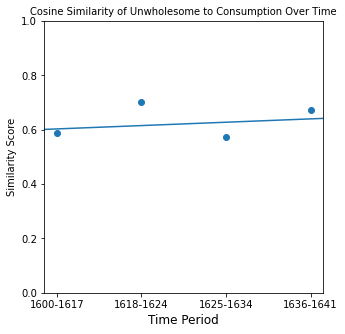

In [94]:
scatter(xData,yData,'Cosine Similarity of Unwholesome to Consumption Over Time','Time Period','Similarity Score')

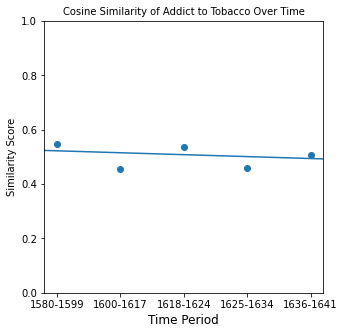

In [6]:
scatter(xData,yData,'Cosine Similarity of Addict to Tobacco Over Time','Time Period','Similarity Score')

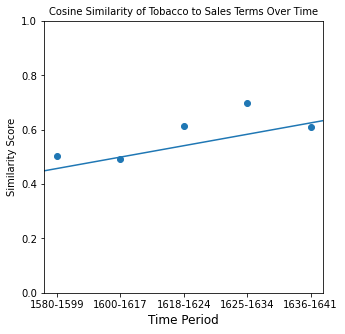

In [199]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Sales Terms Over Time','Time Period','Similarity Score')

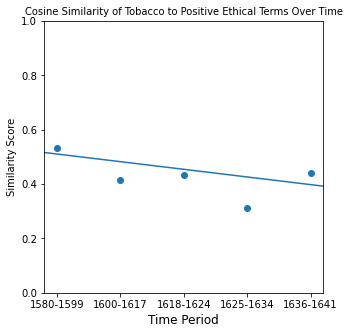

In [209]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Positive Ethical Terms Over Time','Time Period','Similarity Score')

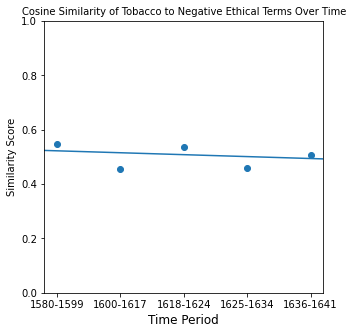

In [211]:
scatter(xData,yData,'Cosine Similarity of Tobacco to Negative Ethical Terms Over Time','Time Period','Similarity Score')